In [1]:
import os
import librosa  # for audio processing
import numpy as np
from sklearn.model_selection import train_test_split

# directories for wav files
dirs = [
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\fireworks5-ogg",
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\rain5-ogg",
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\wind5-ogg",
]




In [2]:
labels = []
data = []

# Loop over all files in all directories
for i, dir in enumerate(dirs):
    for filename in os.listdir(dir):
        if filename.endswith(".ogg"):  # check if it's an .ogg file
            # Load the audio file
            audio, sr = librosa.load(os.path.join(dir, filename), res_type='kaiser_fast')

            # Extract MFCCs from the audio
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            mfccs_processed = np.mean(mfccs.T,axis=0)
            
            # Add the MFCCs to the data list
            data.append(mfccs_processed)

            # Add the label (i.e., the directory index) to the labels list
            labels.append(i)



In [3]:
# Convert data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

# number of labels
num_labels = len(dirs)




In [5]:
# Build model
model = Sequential()

model.add(Convolution1D(128, 5, padding='same', input_shape=(40, 1)))  # Adjust input shape if necessary
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Convolution1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [7]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
11/11 [==============================] - 2s 39ms/step - loss: 5.4410 - accuracy: 0.4412 - val_loss: 1.3364 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 5.1431 - accuracy: 0.5882 - val_loss: 0.9161 - val_accuracy: 0.6818
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 3.7529 - accuracy: 0.6765 - val_loss: 0.9650 - val_accuracy: 0.7273
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 3.3578 - accuracy: 0.6078 - val_loss: 1.0817 - val_accuracy: 0.7045
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 2.7136 - accuracy: 0.6961 - val_loss: 0.6803 - val_accuracy: 0.7500
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 2.9148 - accuracy: 0.5980 - val_loss: 0.9634 - val_accuracy: 0.7500
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 1.3436 - accuracy: 0.7843 - val_loss: 0.3880 - val_accuracy: 0.7955
Epoch 

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test set accuracy: {accuracy * 100}%")

2/2 [==============================] - 0s 33ms/step - loss: 0.2866 - accuracy: 0.8864
Test set accuracy: 88.63636255264282%


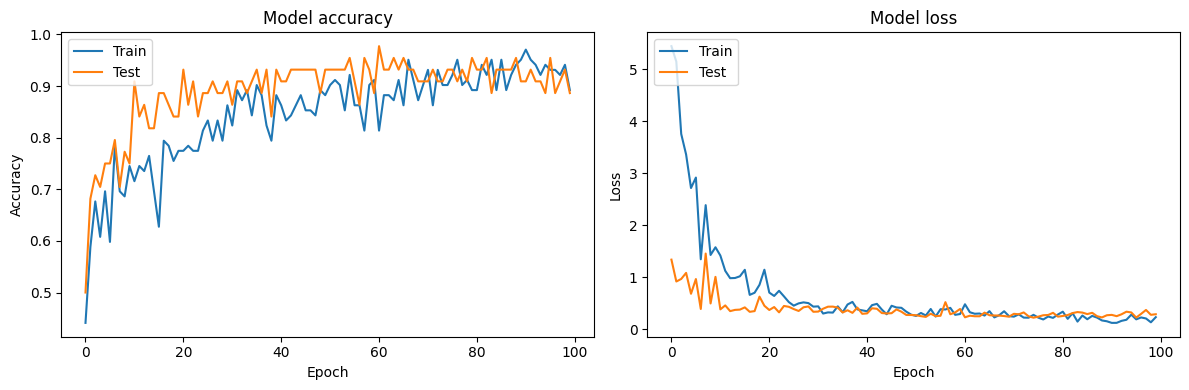

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.90      0.90      0.90        10
           2       1.00      0.69      0.82        13

    accuracy                           0.89        44
   macro avg       0.91      0.86      0.88        44
weighted avg       0.90      0.89      0.88        44



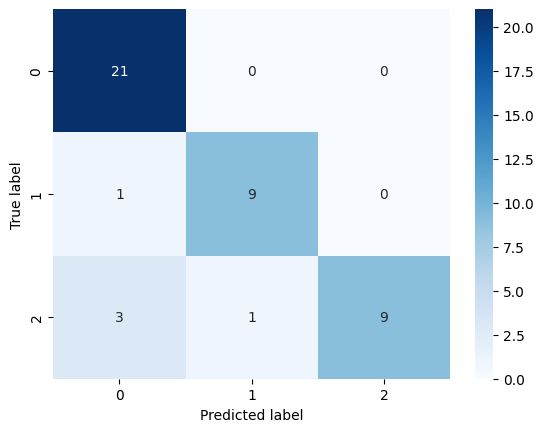

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict class probabilities
y_prob = model.predict(x_test)

# Convert probabilities into class predictions
y_pred = np.argmax(y_prob, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [11]:
# Save the entire model as a SavedModel.
model.save('my_model-5-ogg-mfcc')
# Save the entire model to a HDF5 file.
model.save('my_model-5-ogg-mfcc.h5')

INFO:tensorflow:Assets written to: my_model-5-ogg-mfcc\assets


INFO:tensorflow:Assets written to: my_model-5-ogg-mfcc\assets


['C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\1-sec-ogg-mel.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\1-sec-ogg-mfcc.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\1-sec-wav-mel.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\1-sec-wav-mfcc.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\5-sec-ogg-mel.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\5-sec-ogg-mfcc.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\5-sec-wav-mel.png', 'C:/Users/MSI/OneDrive/Bureaublad/confusion matrix\\5-sec-wav-mfcc.png']
